<a href="https://colab.research.google.com/github/adnaaan10/Confidence-interval-on-titanic/blob/main/Confidence_interval_findings_on_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/cleaned_data1.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: ylabel='Density'>

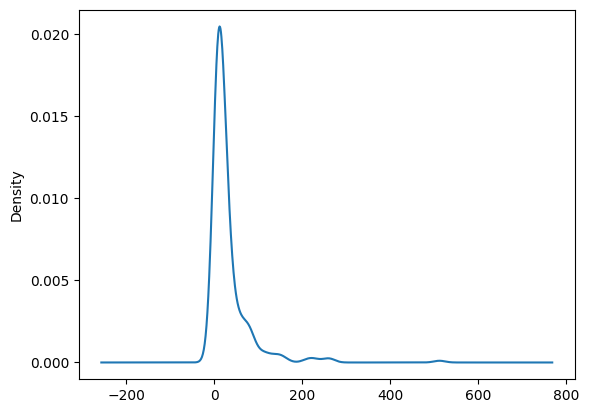

In [ ]:
df['Fare'].plot(kind='kde')

In [ ]:
samples = []
std_samples=[]
for i in range(10):
    samples.append(df['Fare'].dropna().sample(30))
    std_samples.append(np.std(samples[i]))

In [ ]:
samples = np.array(samples)

In [ ]:
sampling_means = samples.mean(axis=1)
sampling_means

array([33.77902667, 20.58291333, 34.29874333, 50.51583   , 30.36694333,
       38.54833   , 57.70471667, 28.39639333, 37.84889   , 34.86875   ])

<Axes: ylabel='Density'>

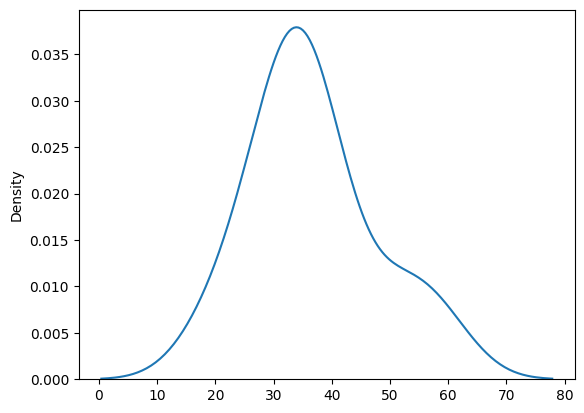

In [ ]:
sns.kdeplot(sampling_means)

In [ ]:
mean_of_sampling_means=sampling_means.mean()
mean_of_sampling_means

36.69105366666666

In [ ]:
std_samples

[41.34941668163275,
 21.499453666077706,
 51.782491132870284,
 73.18670169899788,
 31.383683468979896,
 48.09560224985337,
 96.39519335869772,
 46.5326955648315,
 61.30124140494139,
 46.73015380903962]

In [ ]:
mean_of_std=np.mean(std_samples)
mean_of_std

51.82566330359221

In [ ]:
mean_of_std/np.sqrt(30)

9.462028283015053

**Taken 95% confidence level**

In [ ]:
#alpha=.95
#1-.95=.05
#.05/2=.025
#1-.025=.975

In [ ]:
t_score=2.042

In [ ]:
UPPERLIMIT=mean_of_sampling_means+t_score*(mean_of_std/np.sqrt(30))
UPPERLIMIT

56.0125154205834

In [ ]:
LOWERLIMIT=mean_of_sampling_means-t_score*(mean_of_std/np.sqrt(30))
LOWERLIMIT

17.369591912749925

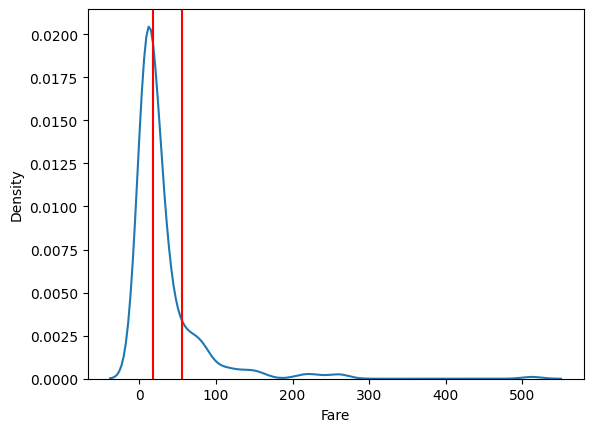

In [ ]:
sns.kdeplot(df['Fare'])
plt.axvline(LOWERLIMIT,color='red')
plt.axvline(UPPERLIMIT,color='red')

**SO, THE 95% OF CONFIDENCE INTERVAL LIE BETWEEN THE RANGE OF 16.70 - 49.11**